# Iris Plants Classification

### Description

<a id='toc'></a>
#### Table of Contents
* [Problem Definition](#defineproblem)
* [Exploratory Data Analysis](#eda)
* [Data Preparation](#dataprep)
* [Algorithm Evaluation](#algoselect)
* [Model Training](#modeling)
* [Deployment Preparation](#deployprep)


---
<a id='defineproblem'></a>

## Problem Definition
[Table of Contents](#toc)

### Description
[Table of Contents](#toc) | [Section](#defineproblem)
#### Problem definition:
Predict the flower class based on available attributes.

#### Problem assumptions:
* Data is accurate
* No missing values
* Data is or can be in a format to be used for machine learning.


#### Similar problems:
* Classifying other floral species
* Classifying cancer cells

### Motivation
[Table of Contents](#toc) | [Section](#defineproblem)
#### Description:
To practice building a prediction model using machine learning techniques.

#### Solution Benefits (model predictions)
* Gain a deeper understanding of machine learning techniques. 
* Obtain more experience with Python and data science projects.
* Can adapt model to other projects.

#### Solution Application
The model could be used for other problems that require prediction analysis.


### Manual Solution
[Table of Contents](#toc) | [Section](#defineproblem)
* Examine all the attributes from each flower class
* Determine similarities in attributes among each class
* Group similar attributes
* Use attribute groupings to identify the flower class

---
<a id='eda'></a>

## Exploratory Data Analysis
[Table of Contents](#toc)

### Basic Information
[Table of Contents](#toc) | [Section](#eda)



In [2]:
# Import Libaries
import pandas as pd
import numpy as np

In [34]:
# Import Data
data_location = "/Users/wmemorgan/Google Drive/Computer_Data_Science_Lab/iris_data_modeling/data/02_prepared_data/iris.data" 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(data_location, names=names)

### Display Sample Data
[Table of Contents](#toc) | [Section](#defineproblem)

 #### Dimensions of Dataset

In [48]:
# number of rows
len(data)

150

In [50]:
# shape
print(data.shape)

(150, 5)


#### Peek at the Data

In [37]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
data.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Statistical Summary

In [51]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Class Distribution

In [53]:
# class distribution
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Visualize Data
[Table of Contents](#toc) | [Section](#eda)

In [27]:
# Import Libaries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Univariate Plots

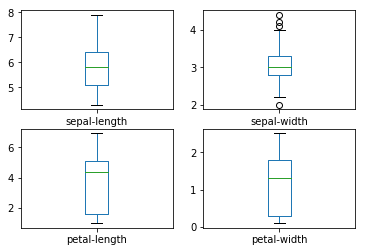

In [56]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

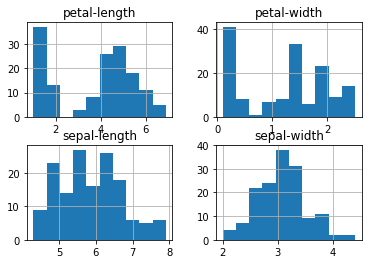

In [59]:
# histograms
data.hist()
plt.show()

#### Multivariate Plots

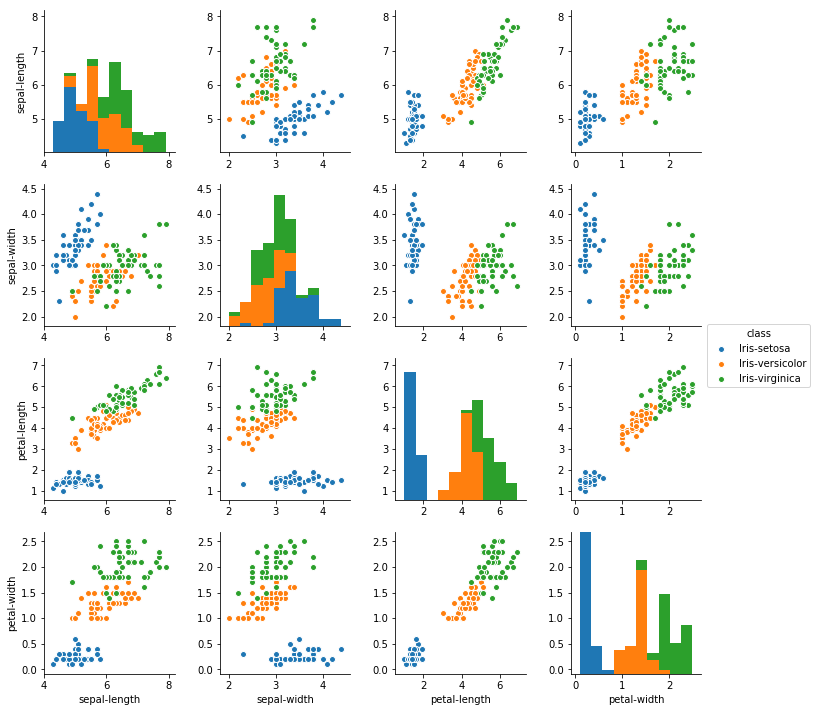

In [61]:
sns.pairplot(data=data, hue="class")
plt.show()

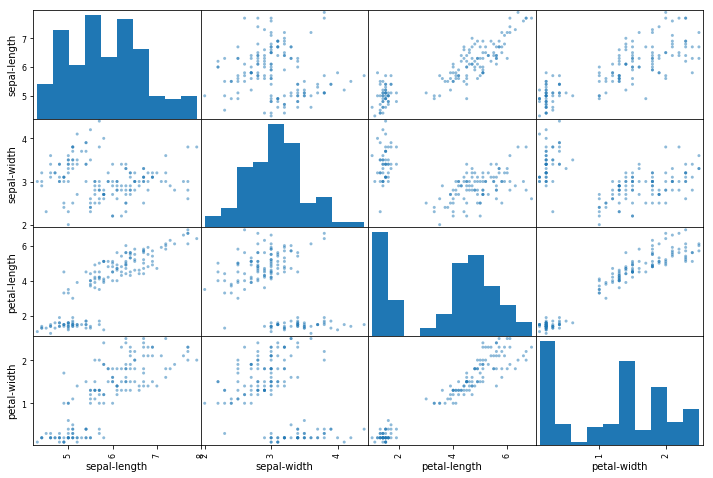

In [67]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12,8))

plt.show()

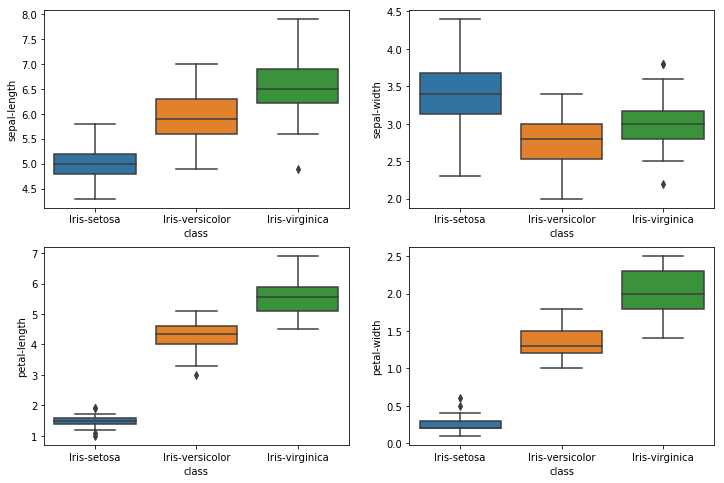

In [75]:
f, axes = plt.subplots(2, 2, figsize=(12,8)) #More than one dimension

bp1 = sns.boxplot(data=data, x="class", y="sepal-length", ax=axes[0,0])
bp2 = sns.boxplot(data=data, x="class", y="sepal-width", ax=axes[0,1])
bp3 = sns.boxplot(data=data, x="class", y="petal-length", ax=axes[1,0])
bp4 = sns.boxplot(data=data, x="class", y="petal-width", ax=axes[1,1])
#plt.show()

---
<a id='dataprep'></a>

## Data Preparation
[Table of Contents](#toc)

#### Split the data into training and test sets

In [94]:
# Import library
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Assign features and output
X = data.drop('class',axis=1)
y = data['class']
test_size = 0.2
seed = 7

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=seed)

---
<a id='algoselect'></a>

## Algorithm Evaluation
[Table of Contents](#toc)

In [89]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

    1. Logistic Regression (LR)
    2. Linear Discriminant Analysis (LDA)
    3. K-Nearest Neighbors (KNN).
    4. Classification and Regression Trees (CART).
    5. Gaussian Naive Bayes (NB).
    6. Support Vector Machines (SVM).
    
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our six models:

In [95]:
# Import Algorithm Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

In [97]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


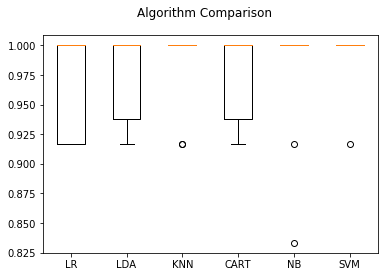

In [98]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

---
<a id='modeling'></a>

## Model Training
[Table of Contents](#toc)

### # Fitting the classifier to the Training set

In [125]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

#### Evaluate Model

In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [124]:
print('Accuracy Score:')
print(accuracy_score(y_test,predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('Classification Report:')
print(classification_report(y_test,predictions))

Accuracy Score:
0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



---
<a id='deployprep'></a>

## Deployment Preparation
[Table of Contents](#toc)

## Summary
### Basic Information
* Number of observations: **150**
* Number of features: **4**
* Data types of features: **Numerical**
* Target variable: **class** *(Categorical)*

#### Other Observations
* No missing data or corrupted data
* Sepal length and petal length variables had the strongest correlation with class.

#### Model Evaluation and Selection
* Selected a mix of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. 
* Used k-fold cross-validation (CV) procedure to evaluate the accuracy score of each algorithm.
* Identified k-Nearest Neighbor (k-NN) as the best algorithm to use for modeling this dataset. **NOTE: Used default parameters for KNNClassifier module**

#### Results
* Prediction model has an accuracy of 90%
* **Success Factors:**
    * High quality data (no corrupt or missing data)
    * k-fold CV for determining the best model
    
#### Conclusion
* Include k-fold CV procedures for supervised classification modeling.
* Will try to evaluate efficacy for regression and clustering modeling.